# **Submission Guidelines:**
1. Submit 1 jupyter notebook containing all the code, results and visualizations and 1 Word document discussing all the results and their comparative analysis.
2. Put these in a zip file named as `22i-7777_Name_BCY-A`
3. Naming convention for the 2 files should be as follows:
    NoteBook: `22i-7777_Name_BCY-A.ipynb` and Report: `22i-7777_Name_BCY-A.docx`.
4. No excuse or resubmission is permissible after the submission deadline.
5. Read the following for report submission guidelines,
    - Your report must contain at least three sections Introduction, Experimentation Explained, Conclusion
    - Your report must contain visual aid to show comparison between the algorithms
    - Font-size: 12, 
    - Font-Family: Times New Roman,
    - Line-Spacing: 1.5pt
6. It is an individual assignment

By following these submission guidelines, you can ensure that your assignment is properly submitted and evaluated. Failure to adhere to these guidelines may result in the deduction of marks or other penalties.
<h4 style='color: red'><br>Deadline: 11:59 PM, 7th-March-2025</h4>

<h1 style='text-align: center'>ASSIGNMENT#02</h1>
<h1 style='text-align: center'>The Quest for a Treasure</h1>
<h2 style='text-align: center'> A comparitive analysis of Informed and Uninformed Searches</h2>

### Background Story
In a magical forest, a brave explorer named Arin sets out on an exciting adventure to find a treasure, hidden inside an ancient temple. The forest is like a giant maze, full of secret paths, magical barriers, and tricky traps.

Arin begins the journey at Campfire Point (S) and must find a way through the maze to reach the Temple (G), facing many challenges along the way.


### Graph Representation of the Forest
The enchanted forest is represented as a graph, where:

<ul>
        <li>Each node represents a location in the forest.</li>
        <li>Each edge represents a valid path.</li>
        <li>Some edges have higher costs due to difficult terrain.</li>
        <li>Portals act as direct jumps between distant nodes, bypassing obstacles.</li>
    </ul>
    
    

  
    
 <h2>Terrain Information</h2>
<p>Each terrain type in the forest has an associated movement cost as follows:</p>

<table border="1">
    <tr>
        <th>Terrain Type</th>
        <th>Marker</th>
        <th>Description</th>
        <th>Cost</th>
        <th>Color</th>
    </tr>
    <tr>
        <td>Normal Path</td>
        <td>0</td>
        <td>Walkable terrain</td>
        <td>1</td>
        <td>Light Gray</td>
    </tr>
    <tr>
        <td>Wall (❌)</td>
        <td>-1</td>
        <td>Impassable obstacle</td>
        <td>∞ (Not allowed)</td>
        <td>White</td>
    </tr>
    <tr>
        <td>Quicksand (⏳)</td>
        <td>2</td>
        <td>Slows movement</td>
        <td>3</td>
        <td>Yellow</td>
    </tr>
    <tr>
        <td>Portal (🔄)</td>
        <td>3</td>
        <td>Instantly moves to exit</td>
        <td>0 (Teleportation)</td>
        <td>Purple</td>
    </tr>
    <tr>
        <td>Wild Beasts (⚠️)</td>
        <td>4</td>
        <td>Dangerous area</td>
        <td>5</td>
        <td>Red</td>
    </tr>
    <tr>
        <td>Start (S)</td>
        <td>5</td>
        <td>Starting position</td>
        <td>0</td>
        <td>Green</td>
    </tr>
    <tr>
        <td>Goal (G)</td>
        <td>6</td>
        <td>Target location</td>
        <td>0</td>
        <td>Blue</td>
    </tr>
</table>


<h2>Task: Finding the Optimal Path</h2>
<p>Your goal is to find the optimal path from S (Campfire Point) to G (Temple of Lumora) using four search strategies.</p>

<h3>Search Strategies to Implement</h3>

You have to implement the following search strategies:
<ul>
    <li>Breadth-First Search (BFS)</li>
    <li>Depth-First Search (DFS)</li>
    <li>Uniform-Cost Search (UCS)</li>
    <li>Greedy Best-First Search (GBFS) (using the most appropriate heuristic)</li>
    <li>A* Search (using the most appropriate heuristic)</li>
</ul>


<h3>Performance Evaluation</h3>
<p>For each search algorithm, track and compare its performance based on the following metrics:</p>
<ul>
    <li> Path found (if any) and its total cost.</li>
    <li> Number of nodes expanded.</li>
    <li> Execution time (using Python’s time module).</li>
    <li> Memory usage (using Python’s psutil or tracemalloc module).</li>
    <li> List of all obstacles faced during the search process.</li>
</ul>

<h3>Visualization Requirements</h3>
<p Generate visualizations to better understand the search performance:</p>
<ul>
    <li>Graph or heatmap of the search process.</li>
    <li>Comparative bar charts showing execution time and memory usage for each algorithm</li>
</ul>

<h3> Hints & Guidelines:</h3>
<ul>
    <li>Use Matplotlib to visualize the paths and performance comparisons.</li>
    <li>Experiment with different heuristics for A* and compare results.</li>
    <li>Use Python’s psutil or tracemalloc module for memory analysis of each algorithm. </li>
</ul>

<h3>Submission Requirements</h3>
<ul>
    <li> Implement the search algorithms in Python.</li>
    <li> Clearly indicate the explored nodes, final path, and total cost.</li>
    <li> Provide visualizations and comparative analysis.</li>
    <li> Discuss the most efficient search strategy based on your findings.</li>
</ul>


### Importing Necessary Modules/Functions


In [12]:
# Random and numpy array imported
from random import randint
from numpy import array

<p style='color: red'>No Changes Should be Made to This Cell</p>

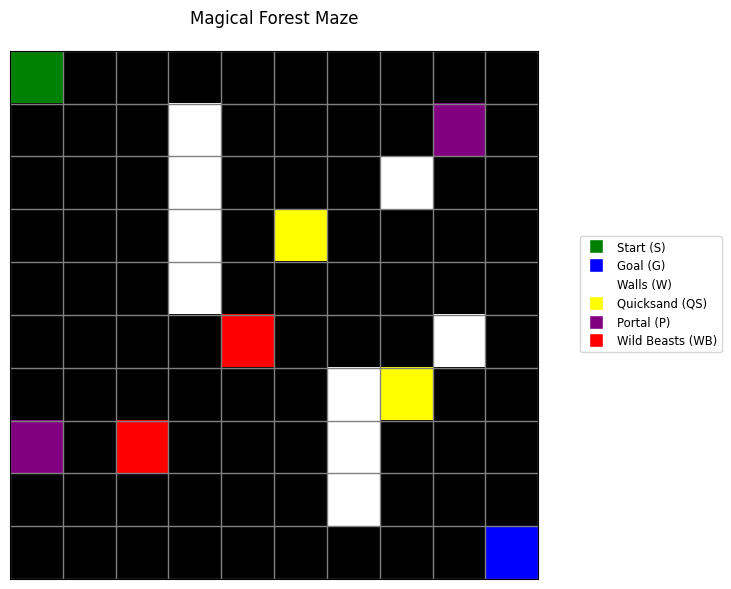

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define grid size
N, M = 10, 10  

# Define symbols
START, GOAL = (0, 0), (9, 9)
WALL, PATH, QUICKSAND, PORTAL, BEAST = -1, 0, 2, 3, 4

# Create an empty grid
grid = np.zeros((N, M))

# Add walls in a controlled manner
walls = [(1, 3), (2, 3), (3, 3), (4, 3), (6, 6), (7, 6), (8, 6), (5, 8), (2, 7)]
for w in walls:
    grid[w] = WALL

# Ensure a clear path by removing unnecessary blockages
clear_path = [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5)]
for p in clear_path:
    grid[p] = PATH

# Add special terrain strategically
grid[3, 5] = QUICKSAND  # Slower path
grid[6, 7] = QUICKSAND  # Another slow zone
grid[5, 4] = BEAST  # Dangerous zone
grid[7, 2] = BEAST  # Another dangerous area

# Place portals strategically
grid[1, 8] = PORTAL  # Portal entrance
grid[7, 0] = PORTAL  # Portal exit

# Mark start and goal
grid[START] = 5  # Start point
grid[GOAL] = 6  # Goal point

# Define colormap for visualization
cmap = mcolors.ListedColormap(["white", "black", "yellow", "purple", "red", "green", "blue"])
bounds = [-1.5, -0.5, 0.5, 2.5, 3.5, 4.5, 5.5, 6.5]  # Boundaries for colors
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the grid with color representation
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(grid, cmap=cmap, norm=norm, interpolation="nearest")

# Add grid lines and labels
ax.set_xticks(np.arange(N + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(M + 1) - 0.5, minor=True)
ax.grid(which="minor", color="gray", linestyle='-', linewidth=1)
ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

# Add legend outside the plot
legend_patches = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="green", markersize=10, label="Start (S)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="blue", markersize=10, label="Goal (G)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="white", markersize=10, label="Walls (W)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="yellow", markersize=10, label="Quicksand (QS)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="purple", markersize=10, label="Portal (P)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="red", markersize=10, label="Wild Beasts (WB)")
]

fig.legend(handles=legend_patches, loc="center left", fontsize="small", bbox_to_anchor=(1, 0.5))

plt.title("Magical Forest Maze", pad=20)
plt.tight_layout()
plt.show()


## Start Your Work From Here!

<p style='color: green'>You Can Start Writing Code and Make Changes to It from Here and Onwards</p>

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

Algorithm: bfs
Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (1, 8), (2, 8), (3, 8), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Total Cost: 17
Nodes Expanded: 90
Execution Time: 0.002252 seconds
Memory Usage: 8368 bytes
Obstacles Faced: [((1, 8), np.float64(3.0)), ((3, 5), np.float64(2.0)), ((7, 0), np.float64(3.0)), ((7, 2), np.float64(4.0)), ((5, 4), np.float64(4.0)), ((6, 7), np.float64(2.0))]
----------------------------------------


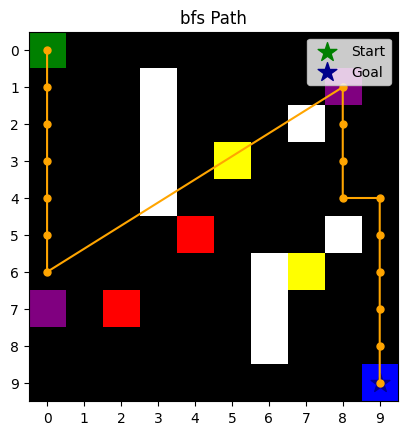

Algorithm: dfs
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (2, 8), (3, 8), (3, 7), (3, 6), (3, 5), (3, 4), (4, 4), (5, 4), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 9)]
Total Cost: 37
Nodes Expanded: 68
Execution Time: 0.001201 seconds
Memory Usage: 7400 bytes
Obstacles Faced: [((7, 0), np.float64(3.0)), ((3, 5), np.float64(2.0)), ((5, 4), np.float64(4.0)), ((6, 7), np.float64(2.0)), ((1, 8), np.float64(3.0)), ((7, 2), np.float64(4.0))]
----------------------------------------


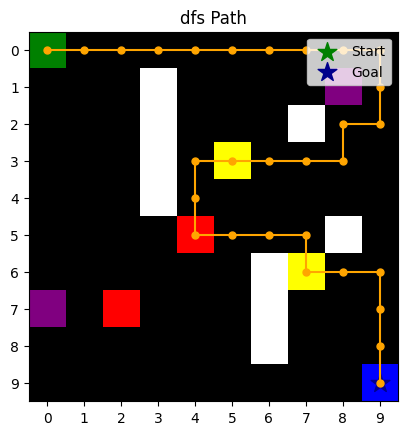

Algorithm: ucs
Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (1, 8), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Total Cost: 16
Nodes Expanded: 89
Execution Time: 0.002638 seconds
Memory Usage: 11768 bytes
Obstacles Faced: [((1, 8), np.float64(3.0)), ((3, 5), np.float64(2.0)), ((7, 0), np.float64(3.0)), ((5, 4), np.float64(4.0)), ((7, 2), np.float64(4.0)), ((6, 7), np.float64(2.0))]
----------------------------------------


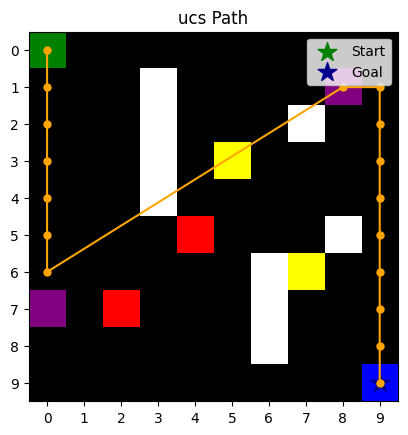

Algorithm: gbfs
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Total Cost: 19
Nodes Expanded: 19
Execution Time: 0.000623 seconds
Memory Usage: 1904 bytes
Obstacles Faced: [((7, 0), np.float64(3.0))]
----------------------------------------


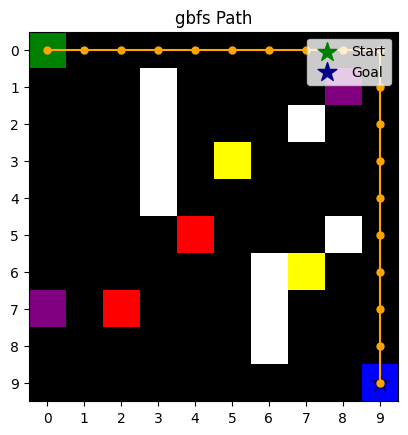

Algorithm: a_star
Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Total Cost: 18
Nodes Expanded: 82
Execution Time: 0.001425 seconds
Memory Usage: 11864 bytes
Obstacles Faced: [((1, 8), np.float64(3.0)), ((3, 5), np.float64(2.0)), ((5, 4), np.float64(4.0)), ((6, 7), np.float64(2.0)), ((7, 0), np.float64(3.0)), ((7, 2), np.float64(4.0))]
----------------------------------------


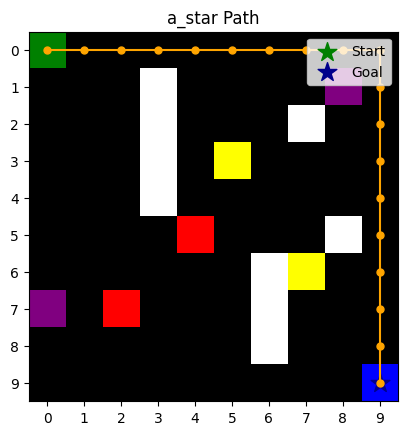

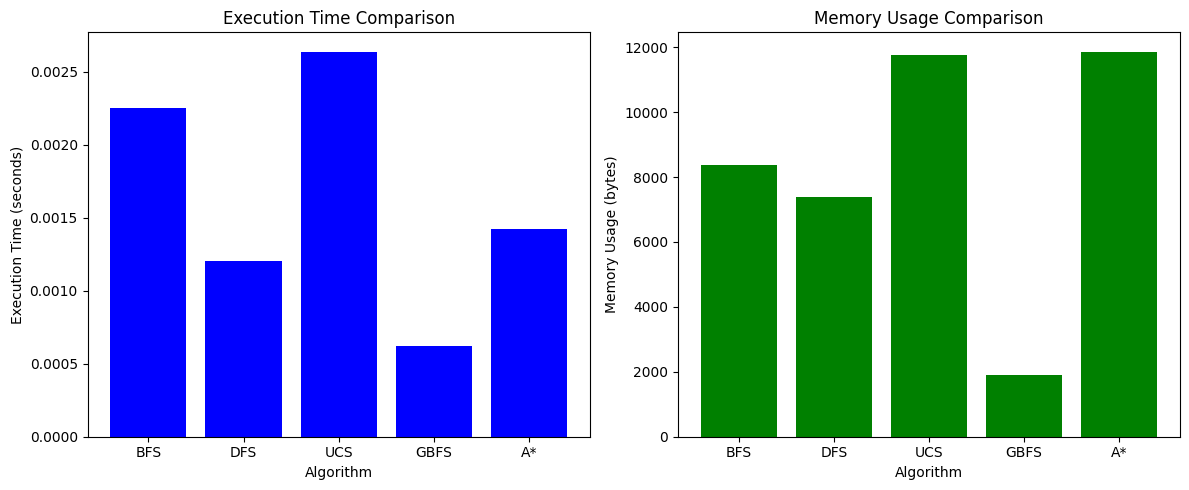

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import heapq
from collections import deque
import time
import tracemalloc

# Define grid size
N, M = 10, 10

# Define terrain types
START, GOAL = (0, 0), (9, 9)
WALL, PATH, QUICKSAND, PORTAL, BEAST = -1, 0, 2, 3, 4

# Create an empty grid
grid = np.zeros((N, M))

# Define walls
walls = [(1, 3), (2, 3), (3, 3), (4, 3), (6, 6), (7, 6), (8, 6), (5, 8), (2, 7)]
for w in walls:
    grid[w] = WALL

# Define special terrain
grid[3, 5] = QUICKSAND  # Slower path
grid[6, 7] = QUICKSAND  
grid[5, 4] = BEAST  # Dangerous zone
grid[7, 2] = BEAST  

grid[1, 8] = PORTAL  # Portal entrance
grid[7, 0] = PORTAL  # Portal exit

# Set start and goal positions
grid[START] = 5  # Start
grid[GOAL] = 6  # Goal

# Portal Mapping
portals = {(1, 8): (7, 0), (7, 0): (1, 8)}

# Movement Cost Mapping
movement_cost = {
    PATH: 1,
    QUICKSAND: 3,  # Takes longer to cross
    BEAST: 5,  # Dangerous zone
    PORTAL: 1,  # Instantly teleports
}

def heuristic(a, b):
    """Manhattan distance heuristic"""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def handle_portal(current):
    """Handle portal teleportation."""
    return portals.get(current, current)

def bfs(grid, start, goal):
    """Breadth-First Search Algorithm"""
    queue = deque([start])
    came_from = {start: None}
    nodes_expanded = 0
    obstacles_faced = []
    
    while queue:
        current = queue.popleft()
        nodes_expanded += 1
        if current == goal:
            break
        x, y = current
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (x + dx, y + dy)
            if 0 <= neighbor[0] < N and 0 <= neighbor[1] < M and grid[neighbor] != WALL:
                neighbor = handle_portal(neighbor)  # Handle portals
                if neighbor not in came_from:
                    came_from[neighbor] = current
                    queue.append(neighbor)
                    if grid[neighbor] in [QUICKSAND, BEAST, PORTAL]:
                        obstacles_faced.append((neighbor, grid[neighbor]))
    
    path = []
    current = goal
    while current:
        path.append(current)
        current = came_from.get(current, None)
    path.reverse()
    
    # Calculate total cost
    total_cost = 0
    for node in path:
        total_cost += movement_cost.get(grid[node], 1)
    
    return path, total_cost, nodes_expanded, obstacles_faced

def dfs(grid, start, goal):
    """Depth-First Search Algorithm"""
    stack = [start]
    came_from = {start: None}
    nodes_expanded = 0
    obstacles_faced = []
    
    while stack:
        current = stack.pop()
        nodes_expanded += 1
        if current == goal:
            break
        x, y = current
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (x + dx, y + dy)
            if 0 <= neighbor[0] < N and 0 <= neighbor[1] < M and grid[neighbor] != WALL:
                neighbor = handle_portal(neighbor)  # Handle portals
                if neighbor not in came_from:
                    came_from[neighbor] = current
                    stack.append(neighbor)
                    if grid[neighbor] in [QUICKSAND, BEAST, PORTAL]:
                        obstacles_faced.append((neighbor, grid[neighbor]))
    
    path = []
    current = goal
    while current:
        path.append(current)
        current = came_from.get(current, None)
    path.reverse()
    
    # Calculate total cost
    total_cost = 0
    for node in path:
        total_cost += movement_cost.get(grid[node], 1)
    
    return path, total_cost, nodes_expanded, obstacles_faced

def ucs(grid, start, goal):
    """Uniform-Cost Search Algorithm"""
    priority_queue = [(0, start)]
    came_from = {start: None}
    cost_so_far = {start: 0}
    nodes_expanded = 0
    obstacles_faced = []
    
    while priority_queue:
        current_cost, current = heapq.heappop(priority_queue)
        nodes_expanded += 1
        if current == goal:
            break
        x, y = current
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (x + dx, y + dy)
            if 0 <= neighbor[0] < N and 0 <= neighbor[1] < M and grid[neighbor] != WALL:
                neighbor = handle_portal(neighbor)  # Handle portals
                new_cost = current_cost + movement_cost.get(grid[neighbor], 1)
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    heapq.heappush(priority_queue, (new_cost, neighbor))
                    came_from[neighbor] = current
                    if grid[neighbor] in [QUICKSAND, BEAST, PORTAL]:
                        obstacles_faced.append((neighbor, grid[neighbor]))
    
    path = []
    current = goal
    while current:
        path.append(current)
        current = came_from.get(current, None)
    path.reverse()
    
    # Calculate total cost
    total_cost = cost_so_far[goal]
    
    return path, total_cost, nodes_expanded, obstacles_faced

def gbfs(grid, start, goal):
    """Greedy Best-First Search Algorithm"""
    priority_queue = [(heuristic(start, goal), start)]
    came_from = {start: None}
    nodes_expanded = 0
    obstacles_faced = []
    
    while priority_queue:
        _, current = heapq.heappop(priority_queue)
        nodes_expanded += 1
        if current == goal:
            break
        x, y = current
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (x + dx, y + dy)
            if 0 <= neighbor[0] < N and 0 <= neighbor[1] < M and grid[neighbor] != WALL:
                neighbor = handle_portal(neighbor)  # Handle portals
                if neighbor not in came_from:
                    heapq.heappush(priority_queue, (heuristic(neighbor, goal), neighbor))
                    came_from[neighbor] = current
                    if grid[neighbor] in [QUICKSAND, BEAST, PORTAL]:
                        obstacles_faced.append((neighbor, grid[neighbor]))
    
    path = []
    current = goal
    while current:
        path.append(current)
        current = came_from.get(current, None)
    path.reverse()
    
    # Calculate total cost
    total_cost = 0
    for node in path:
        total_cost += movement_cost.get(grid[node], 1)
    
    return path, total_cost, nodes_expanded, obstacles_faced

def a_star(grid, start, goal):
    """A* Search Algorithm"""
    priority_queue = [(0, start)]
    came_from = {start: None}
    cost_so_far = {start: 0}
    nodes_expanded = 0
    obstacles_faced = []
    
    while priority_queue:
        _, current = heapq.heappop(priority_queue)
        nodes_expanded += 1
        if current == goal:
            break
        x, y = current
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (x + dx, y + dy)
            if 0 <= neighbor[0] < N and 0 <= neighbor[1] < M and grid[neighbor] != WALL:
                neighbor = handle_portal(neighbor)  # Handle portals
                new_cost = cost_so_far[current] + movement_cost.get(grid[neighbor], 1)
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    heapq.heappush(priority_queue, (new_cost + heuristic(neighbor, goal), neighbor))
                    came_from[neighbor] = current
                    if grid[neighbor] in [QUICKSAND, BEAST, PORTAL]:
                        obstacles_faced.append((neighbor, grid[neighbor]))
    
    path = []
    current = goal
    while current:
        path.append(current)
        current = came_from.get(current, None)
    path.reverse()
    
    # Calculate total cost
    total_cost = cost_so_far[goal]
    
    return path, total_cost, nodes_expanded, obstacles_faced

def plot_grid(grid, path, title="Path"):
    """Plot the grid with the given path."""
    # Define colormap for visualization
    cmap = mcolors.ListedColormap(["white", "black", "yellow", "purple", "red", "green", "blue"])
    bounds = [-1.5, -0.5, 0.5, 2.5, 3.5, 4.5, 5.5, 6.5]  # Boundaries for colors
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(grid, cmap=cmap, norm=norm)

    if path:
        x, y = zip(*path)
        ax.plot(y, x, marker="o", color="orange", markersize=5, linestyle="-")

    # Highlight start and goal
    ax.scatter(START[1], START[0], color="green", s=200, label="Start", marker="*")
    ax.scatter(GOAL[1], GOAL[0], color="darkblue", s=200, label="Goal", marker="*")


    ax.set_xticks(range(M))
    ax.set_yticks(range(N))
    ax.set_xticklabels(range(M))
    ax.set_yticklabels(range(N))
    ax.set_title(title)
    ax.legend(loc="upper right")

    plt.show()


def measure_performance(algorithm, grid, start, goal):
    """Measure execution time and memory usage of an algorithm."""
    tracemalloc.start()  # Start tracking memory usage
    start_time = time.time()  # Start tracking execution time
    
    # Run the algorithm
    path, total_cost, nodes_expanded, obstacles_faced = algorithm(grid, start, goal)
    
    end_time = time.time()  # Stop tracking execution time
    _, peak_memory = tracemalloc.get_traced_memory()  # Get peak memory usage
    tracemalloc.stop()  # Stop tracking memory usage
    
    execution_time = end_time - start_time
    
    # Print results
    print(f"Algorithm: {algorithm.__name__}")
    print(f"Path: {path}")
    print(f"Total Cost: {total_cost}")
    print(f"Nodes Expanded: {nodes_expanded}")
    print(f"Execution Time: {execution_time:.6f} seconds")
    print(f"Memory Usage: {peak_memory} bytes")
    print(f"Obstacles Faced: {obstacles_faced}")
    print("-" * 40)
    
    return path, total_cost, nodes_expanded, execution_time, peak_memory, obstacles_faced

# List of algorithms to compare
algorithms = [bfs, dfs, ucs, gbfs, a_star]
algorithm_names = ["BFS", "DFS", "UCS", "GBFS", "A*"]

# Measure performance for each algorithm
execution_times = []
memory_usages = []

for algorithm in algorithms:
    path, total_cost, nodes_expanded, execution_time, peak_memory, obstacles_faced = measure_performance(algorithm, grid, START, GOAL)
    execution_times.append(execution_time)
    memory_usages.append(peak_memory)
    plot_grid(grid, path, title=f"{algorithm.__name__} Path")

# Plot comparative bar graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Execution Time Bar Graph
ax1.bar(algorithm_names, execution_times, color="blue")
ax1.set_xlabel("Algorithm")
ax1.set_ylabel("Execution Time (seconds)")
ax1.set_title("Execution Time Comparison")

# Memory Usage Bar Graph
ax2.bar(algorithm_names, memory_usages, color="green")
ax2.set_xlabel("Algorithm")
ax2.set_ylabel("Memory Usage (bytes)")
ax2.set_title("Memory Usage Comparison")

plt.tight_layout()
plt.show()

<hr style="height:1px;border:none;color:#333;background-color:#333;" />